In [ ]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Libraries for today's project
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Part 1: Sprint Challenge Practice

- Can I import a CSV file into a DataFrame?
- Can I create a scatter plot?
- Can I split a DataFrame into a target vector and feature matrix?
- Can I split a dataset into a training set and a test set?
- Can I establish the baseline mean absolute error for a regression problem?
- Can I combine transformers with a predictor using a pipeline?
- Can I build a linear regresion model and a ridge regression model?
- Can I evaluate a model using common metrics like mean absolute error, root mean squared error, and R^2?
- If given a feature matrix, can I use my model to create a list of predictions?
- Can I create a horizontal bar chart with the coefficients from a linear model?

# Part 2: Pipelines and Plotting

Let's revise [our work from yesterday](https://tinyurl.com/yb9cz6n5).

# Part 3: Logistic Regression

# I. Wrangle Data

In [ ]:
def wrangle(filepath):
  df =pd.read_csv(filepath, index_col='PassengerId')
  df.drop(columns= ['Name', 'Ticket', 'Cabin'], inplace= True)
  df['Pclass'] = df['Pclass'].astype('object')
  return df

In [ ]:
# The data came in 2 data sets (Train and Test)

df = wrangle(DATA_PATH+'titanic/train.csv')
X_test = wrangle(DATA_PATH+'titanic/test.csv')

In [ ]:
print('Train Shape:',df.shape)
print('Test Shape:',test.shape)

Train Shape: (891, 8)
Test Shape: (418, 10)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


## II. Split Data

In [ ]:
# Split TV (target vector) from FM (feature matrix)
target = 'Survived'
y = df[target]
X = df.drop(columns=target)

Since there's no time series component, we should do a randomized train-validation split.

In [ ]:
# Split our data into a TRAINING set and VALIDATION set

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)

## III. Establish our baseline

- This is a **classification problem**, so we look at the **majority class** to calculate baseline **accuracy score**.

In [ ]:
Baseline = y_train.value_counts(normalize=True).max()

print('Baseline Accuracy:', round(Baseline,3)*100,'%')

Baseline Accuracy: 62.4 %


## IV. Build Model

- Why would regular linear regression not work here?

Text(0, 0.5, 'Survived?')

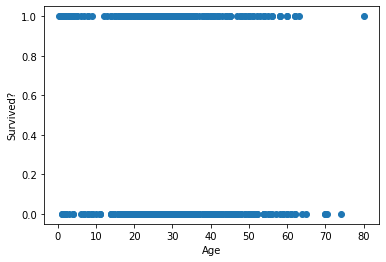

In [ ]:
plt.scatter(X_train['Age'], y_train)
plt.xlabel('Age')
plt.ylabel('Survived?')

What we need for our model pipeline:

- `OneHotEncoder`
- `SimpleImputer`
- `LogisticRegression`

In [ ]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'), # Fills NaN values with column Mean
    StandardScaler(), # re-scales all features (mean=0, std=1)
    LogisticRegression()
)

model.fit(X_train,y_train);

## V. Check Metrics

In [ ]:
print('Model Training Accuracy:', round(model.score(X_train, y_train),4)*100 ,'%')
print('Model Validation Accuracy:', round(model.score(X_val, y_val),4)*100 ,'%')

Model Training Accuracy: 80.2 %
Model Validation Accuracy: 81.01 %


In [ ]:
model.predict(X_test)[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [ ]:
model.predict_proba(X_test)[:10]

array([[0.88695944, 0.11304056],
       [0.5870133 , 0.4129867 ],
       [0.87717296, 0.12282704],
       [0.89215143, 0.10784857],
       [0.42008258, 0.57991742],
       [0.84589367, 0.15410633],
       [0.31573186, 0.68426814],
       [0.81784466, 0.18215534],
       [0.2130367 , 0.7869633 ],
       [0.92303113, 0.07696887]])